In [11]:
import numpy as np 
import pandas as pd 
import os 
import pickle 
import warnings
warnings.filterwarnings("ignore")

## Remove the empty files from the KSC MERLIN Cloud to Cloud Dataset

In [12]:
data_dir = '/Users/brandonmcclung/Data/KSC_Weather_Archive/MERLIN_CC/'
yrs = ['2022']
mos = ['01','02','03','04','05','06','07','08','09','10','11','12']
for yr in yrs:
    for mo in mos:
        dir = data_dir+yr+'_CC/'+mo+'/'
        files = os.listdir(dir)
        for file in files:
            try:
                    temp = pd.read_csv(dir+file,sep=' ',header=None,usecols=[0,2,6,8,12,15,20,22,24,26],low_memory=False)
            except:
                print('no data: '+file+' removing')
                os.remove(dir+file)


## Build a dataframe for each month

In [15]:
data_dir = '/Users/brandonmcclung/Data/KSC_Weather_Archive/MERLIN_CC/'
yrs = ['2022']
mos = ['01','02','03','04','05','06','07','08','09','10','11','12']
i=0
for yr in yrs:
    for mo in mos:
        print(mo)
        if mo=='06':
            first_file=True
            dir = data_dir+yr+'_CC/'+mo+'/'
            files = os.listdir(dir)
            for file in files:
                if first_file==True:
                    first_file=False
                    merlin_cc = pd.read_csv(dir+file,sep=' ',header=None,usecols=[0,2,6,8,20,22,24,26],low_memory=False,\
                        on_bad_lines='skip')
                else:
                    print(file)
                    merlin_cc = merlin_cc.append(pd.read_csv(dir+file,sep=' ',header=None,usecols=[0,2,6,8,20,22,24,26],\
                        on_bad_lines='skip',low_memory=False))
            data_stor = '/Users/brandonmcclung/Data/pickles/'
            file = open(data_stor+yr+'_'+mo+'_merlin_cc_df.p','wb')
            pickle.dump(merlin_cc,file)
            file.close()    
merlin_cc.rename({0:'Date',2:'Time',6:'Lat',8:'Lon',20:'SemiMajor',22:'SemiMinor',24:'Ellipse_Angle',26:'Sensors'},inplace=True,axis=1)
merlin_cc.dropna(inplace=True,axis=0)
merlin_cc = convert_lat_lon(merlin_cc)
merlin_cc['Date_Time'] = pd.to_datetime(merlin_cc['Date']+' '+merlin_cc['Time'],errors='coerce')

01
02
03
04
05
06
KSCCC20220608.dat
KSCCC20220620.dat
KSCCC20220621.dat
KSCCC20220609.dat
KSCCC20220625.dat
KSCCC20220619.dat
KSCCC20220618.dat
KSCCC20220630.dat
KSCCC20220626.dat
KSCCC20220627.dat
KSCCC20220602.dat
KSCCC20220616.dat
KSCCC20220617.dat
KSCCC20220603.dat
KSCCC20220629.dat
KSCCC20220615.dat
KSCCC20220614.dat
KSCCC20220610.dat
KSCCC20220604.dat
KSCCC20220605.dat
KSCCC20220611.dat
KSCCC20220607.dat
KSCCC20220613.dat
KSCCC20220606.dat
07
08
09
10
11
12


In [14]:
import re
def convert_lat_lon(merlin_cc):
    
    temp_merlin = merlin_cc
    temp_merlin[['Lat_Deg','Lat_Min','Lat_Seconds']] =  temp_merlin['Lat'].str.split(':',expand=True)
    temp_merlin['Lat_Deg'] = temp_merlin['Lat_Deg'].astype('float')
    temp_merlin['Lat_Min'] = temp_merlin['Lat_Min'].astype('float')/60. 
    temp_merlin['Lat_Seconds'] = temp_merlin['Lat_Seconds'].astype('float')/3600.
    temp_merlin['Lat_Decimal'] = temp_merlin['Lat_Deg']+temp_merlin['Lat_Min']+temp_merlin['Lat_Seconds']
    
    temp_merlin[['Lon_Deg','Lon_Min','Lon_Seconds']] = temp_merlin['Lon'].str.split(':',expand=True)
    temp_merlin['Lon_Deg'] = temp_merlin['Lon_Deg'].astype('float')
    temp_merlin['Lon_Min'] = temp_merlin['Lon_Min'].astype('float')/60.
    temp_merlin['Lon_Seconds'] = temp_merlin['Lon_Min'].astype('float')/3600. 
    temp_merlin['Lon_Decimal'] = temp_merlin['Lon_Deg']-temp_merlin['Lon_Min']-temp_merlin['Lat_Seconds']

    return temp_merlin



In [16]:
merlin_cc

,Date,Time,Lat,Lon,SemiMajor,SemiMinor,Ellipse_Angle,Sensors,Lat_Deg,Lat_Min,Lat_Seconds,Lat_Decimal,Lon_Deg,Lon_Min,Lon_Seconds,Lon_Decimal,Date_Time
0,06/23/2022,19:18:33.8223000,29:00:34,-81:26:55,04.70,00.70,123,"62,64,65,66,67,68,69,70,71",29.0,0.000000,0.009444,29.009444,-81.0,0.433333,0.000120,-81.442778,2022-06-23 19:18:33.822300
1,06/23/2022,19:18:38.6670000,29:02:28,-81:32:21,04.30,00.80,125,"62,65,66,67,68,69,71",29.0,0.033333,0.007778,29.041111,-81.0,0.533333,0.000148,-81.541111,2022-06-23 19:18:38.667000
2,06/23/2022,19:24:16.3418000,29:02:06,-81:30:01,06.60,00.90,123,"62,64,65,66,67,68,69,70,71",29.0,0.033333,0.001667,29.035000,-81.0,0.500000,0.000139,-81.501667,2022-06-23 19:24:16.341800
3,06/23/2022,19:24:16.3419000,29:04:34,-81:33:17,05.70,00.80,123,"62,65,66,67,68,69,70",29.0,0.066667,0.009444,29.076111,-81.0,0.550000,0.000153,-81.559444,2022-06-23 19:24:16.341900
8,06/23/2022,19:25:12.5077000,29:04:13,-81:34:12,04.50,00.80,125,"62,65,66,67,69,70",29.0,0.066667,0.003611,29.070278,-81.0,0.566667,0.000157,-81.570278,2022-06-23 19:25:12.507700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950495,06/06/2022,23:59:54.2683000,26:51:30,-80:07:06,14.80,01.60,160,"62,64,65,66,68,69,71",26.0,0.850000,0.008333,26.858333,-80.0,0.116667,0.000032,-80.125000,2022-06-06 23:59:54.268300
2950496,06/06/2022,23:59:54.2684000,26:49:58,-80:05:49,15.40,01.60,160,"62,64,65,66,68,69,71",26.0,0.816667,0.016111,26.832778,-80.0,0.083333,0.000023,-80.099444,2022-06-06 23:59:54.268400
2950498,06/06/2022,23:59:54.2944000,27:16:08,-80:15:13,11.80,01.50,158,"62,64,65,66,68,69",27.0,0.266667,0.002222,27.268889,-80.0,0.250000,0.000069,-80.252222,2022-06-06 23:59:54.294400
2950499,06/06/2022,23:59:54.3492000,26:51:27,-80:06:38,21.30,02.00,162,"62,65,66,68,69",26.0,0.850000,0.007500,26.857500,-80.0,0.100000,0.000028,-80.107500,2022-06-06 23:59:54.349200


In [17]:
merlin_cc.set_index(merlin_cc['Date_Time'],inplace=True)
merlin_cc.sort_index(axis=0,inplace=True)
merlin_cc.dropna(axis=0,inplace=True)
merlin_cc

,Date,Time,Lat,Lon,SemiMajor,SemiMinor,Ellipse_Angle,Sensors,Lat_Deg,Lat_Min,Lat_Seconds,Lat_Decimal,Lon_Deg,Lon_Min,Lon_Seconds,Lon_Decimal,Date_Time
Date_Time,,,,,,,,,,,,,,,,,
2022-01-01 00:03:24.980500,/2022,00:03:24.9805000,28:44:13,-80:38:36,00.50,00.30,009,"62,66,67,68,69,70",28.0,0.733333,0.003611,28.736944,-80.0,0.633333,0.000176,-80.636944,2022-01-01 00:03:24.980500
2022-01-01 00:25:33.802800,/2022,00:25:33.8028000,28:32:14,-80:17:41,01.40,00.50,092,"68,69,70,71",28.0,0.533333,0.003889,28.537222,-80.0,0.283333,0.000079,-80.287222,2022-01-01 00:25:33.802800
2022-01-01 00:27:16.324400,/2022,00:27:16.3244000,28:59:31,-80:02:46,05.70,01.10,048,"62,66,69,71",28.0,0.983333,0.008611,28.991944,-80.0,0.033333,0.000009,-80.041944,2022-01-01 00:27:16.324400
2022-01-01 00:47:44.370000,/2022,00:47:44.3700000,27:34:04,-79:41:32,15.4,1.4,137.0,"62,68,69,71",27.0,0.566667,0.001111,27.567778,-79.0,0.683333,0.000190,-79.684444,2022-01-01 00:47:44.370000
2022-01-01 00:51:05.600100,/2022,00:51:05.6001000,28:39:15,-80:00:23,04.30,00.80,082,"62,67,68,69,70",28.0,0.650000,0.004167,28.654167,-80.0,0.000000,0.000000,-80.004167,2022-01-01 00:51:05.600100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01 21:12:55.193600,/11/2022,21:12:55.1936000,29:01:20,-80:34:04,01.70,00.60,026,"67,68,69,71",29.0,0.016667,0.005556,29.022222,-80.0,0.566667,0.000157,-80.572222,2022-11-01 21:12:55.193600
2022-11-01 21:29:31.455400,/11/2022,21:29:31.4554000,29:07:47,-80:34:17,02.50,00.60,022,"65,67,68,69,71",29.0,0.116667,0.013056,29.129722,-80.0,0.566667,0.000157,-80.579722,2022-11-01 21:29:31.455400
2022-11-01 21:58:22.404400,/11/2022,21:58:22.4044000,29:09:31,-81:14:24,04.60,00.80,153,"62,65,66,68",29.0,0.150000,0.008611,29.158611,-81.0,0.233333,0.000065,-81.241944,2022-11-01 21:58:22.404400


In [ ]:
temp = merlin_cc.resample('1M').count()

<AxesSubplot:xlabel='Date_Time'>

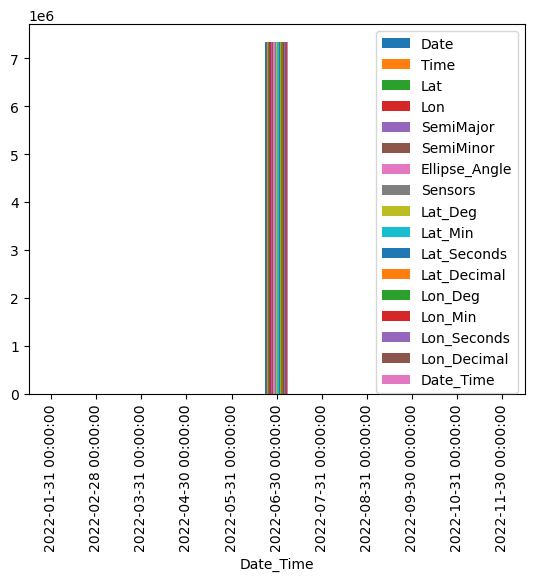

In [ ]:
temp.plot(kind='bar')

In [133]:
temp1 = merlin_cc[merlin_cc.index.month==6]

In [31]:
temp1.to_csv('/Users/brandonmcclung/Desktop/datawrangle.txt')


In [107]:
import pandas as pd
mrms_lats = pd.read_pickle('/Users/brandonmcclung/Data/pickles/MRMS_lat.p')
mrms_lons = pd.read_pickle('/Users/brandonmcclung/Data/pickles/MRMS_lon.p')


cape_lon_bounds = [-82,-79.5]
cape_lat_bound = [27,29]

mrms_lats = mrms_lats[:,1]
mrms_lons = mrms_lons[0,:]

cape_lats = mrms_lats[mrms_lats>=27]#get the latitudes of the cape grid only
cape_lats = cape_lats[cape_lats<=29]

cape_lons = mrms_lons[mrms_lons>=(-82.+360.)]#get the longitudes over the cape grid
cape_lons = cape_lons[cape_lons<=(-79.5+360.)]

xedge = cape_lons
yedge = cape_lats

xmid = [] #Blank array
ymid = [] #Blank array

i=0
while(i < len(xedge)-1):
    xmid.append((xedge[i]+xedge[i+1])/2) #Calculate and append midpoints
    i+=1
i=0
while(i < len(yedge)-1):
    ymid.append((yedge[i]+yedge[i+1])/2) #Calculate and append midpoints
    i+=1

array([278.00499863, 278.01499863, 278.02499863, 278.03499863,
       278.04499863, 278.05499863, 278.06499863, 278.07499863,
       278.08499863, 278.09499863, 278.10499863, 278.11499863,
       278.12499862, 278.13499862, 278.14499862, 278.15499862,
       278.16499862, 278.17499862, 278.18499862, 278.19499862,
       278.20499862, 278.21499862, 278.22499862, 278.23499862,
       278.24499862, 278.25499862, 278.26499862, 278.27499862,
       278.28499862, 278.29499862, 278.30499862, 278.31499862,
       278.32499862, 278.33499862, 278.34499862, 278.35499862,
       278.36499862, 278.37499862, 278.38499862, 278.39499862,
       278.40499862, 278.41499862, 278.42499862, 278.43499862,
       278.44499862, 278.45499862, 278.46499862, 278.47499861,
       278.48499861, 278.49499861, 278.50499861, 278.51499861,
       278.52499861, 278.53499861, 278.54499861, 278.55499861,
       278.56499861, 278.57499861, 278.58499861, 278.59499861,
       278.60499861, 278.61499861, 278.62499861, 278.63

In [105]:
mrms_lons

array([230.005   , 230.015   , 230.025   , ..., 299.974998, 299.984998,
       299.994998])

In [141]:
import util
import datetime as dt
import xarray as xr

temp1 = temp1[200:]
#first time rounded down/backward to the nearest 5 minutes
first_time = temp1['Date_Time'][0]
print(first_time)
start_time = first_time.replace(minute=round(first_time.minute,-1),second=0,microsecond=0,nanosecond=0) #start_slicing with this time

#last time rounded up to the forward nearest 5 minutes
last_time = temp1['Date_Time'][len(temp1)-1]
end_time = last_time.replace(minute=round(end_time.minute,+1),second=0,microsecond=0,nanosecond=0)


# last_time = temp1['Date_Time'][len(temp1)-1]
time_sample = dt.timedelta(0, 300)


temp_array = xr.Dataset()
tempArrayList = []
tempArrayTimeList = []
t=0
while(start_time<=end_time):
    print(t)
    if t<15:
        temp_df = temp1[slice(start_time,start_time+time_sample)]
        print(len(temp_df))
        C = util.boxbin(temp_df['Lon_Decimal']+360, temp_df['Lat_Decimal'], xedge, yedge, mincnt=0)
        tempArray = xr.Dataset(
                data_vars=dict(strikes=(["x", "y"], C)),
                coords=dict(
                    lon=(["x"], xmid),
                    lat=(["y"], ymid),
                ),
                attrs=dict(description="Lightning data"),
            )  # Create dataset
        tempArrayList.append(tempArray)
        tempArrayTimeList.append(start_time)

    start_time = start_time+time_sample
    t=t+1
tempArray = xr.concat(tempArrayList, data_vars='all', dim='time')
tempArray = tempArray.assign_coords(time=tempArrayTimeList)
tempArray = tempArray.fillna(0)
tempArray.to_netcdf(path=f'lightningData{str(start_time)[0]}.nc') #Save
print(f"Saved netcdf lightningData{str(start_time).split(' ')[0]}.nc") #Print save message



2022-06-02 19:28:48.083000
0
69
1
83
2
64
3
63
4
47
5
108
6
165
7
74
8
73
9
104
10
97
11
33
12
17
13
11
14
20
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258

In [140]:
tempArray

<xarray.Dataset>
Dimensions:  (time: 15, x: 249, y: 199)
Coordinates:
    lon      (x) float64 278.0 278.0 278.0 278.0 ... 280.5 280.5 280.5 280.5
    lat      (y) float64 28.99 28.98 28.97 28.96 ... 27.04 27.03 27.02 27.01
  * time     (time) datetime64[ns] 2022-06-02T19:20:00 ... 2022-06-02T20:30:00
Dimensions without coordinates: x, y
Data variables:
    strikes  (time, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    description:  Lightning data

,Date,Time,Lat,Lon,SemiMajor,SemiMinor,Ellipse_Angle,Sensors,Lat_Deg,Lat_Min,Lat_Seconds,Lat_Decimal,Lon_Deg,Lon_Min,Lon_Seconds,Lon_Decimal,Date_Time,Ltg_Source_Count
Date_Time,,,,,,,,,,,,,,,,,,
2022-06-01 00:55:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2022-06-01 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-06-01 01:05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-06-01 01:10:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-06-01 01:15:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 23:35:00,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403,6403
2022-06-30 23:40:00,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865
2022-06-30 23:45:00,7597,7597,7597,7597,7597,7597,7597,7597,7597,7597,7597,7597,7597,7597,7597,7597,7597,7597


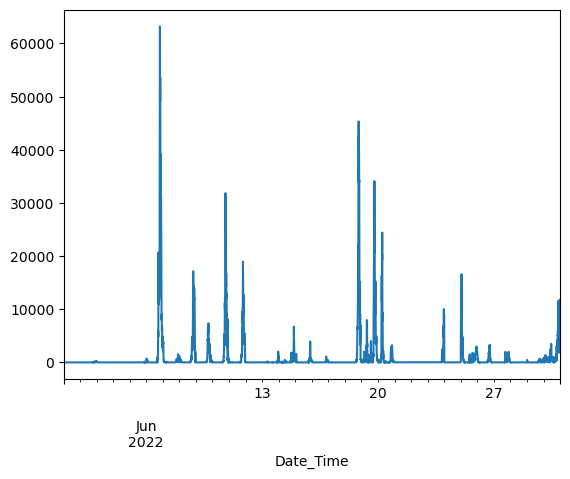

In [ ]:
resampled_jun22_cc = temp1.resample('5T').count()
resampled_jun22_cc['Ltg_Source_Count'] = resampled_jun22_cc['Lat']
resampled_jun22_cc['Ltg_Source_Count'].plot()
resampled_jun22_cc